Back to the [Support Vector Machine Notebook](./support-vector-machine.ipynb)

Back to the [ML notebook](./ml.ipynb)

To the [README](./README.md)

--------------------------------------------------------------------------------

# Support Vector Machine+

We are going to repeat the same steps again, just with the ramp exploit dataset.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVR
from sklearn.metrics import root_mean_squared_error

# set the theme for seaborn graphics
sns.set_theme(context='paper', style='whitegrid')

In [2]:
# load the training and testing data
df_train = [
    pd.read_csv(f'data/df_train_with_hist_{loc}.csv', index_col=0)
    for loc in range(1, 5)
]
df_test = [
    pd.read_csv(f'data/df_test_with_hist_{loc}.csv', index_col=0)
    for loc in range(1, 5)
]

In [3]:
# define target and features
X_train = [
    frame.drop('Power', axis=1)
    for frame in df_train
]
y_train = [
    frame.Power
    for frame in df_train
]

X_test = [
    frame.drop('Power', axis=1)
    for frame in df_test
]
y_true = [
    frame.Power
    for frame in df_test
]

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
param_grid = {
    'C': [.1 + n*.1 for n in range(20)],
}

base_estimator = LinearSVR(
    loss='squared_epsilon_insensitive',     # l2 loss
    epsilon=1.e-3,
    random_state=404
)

# instantiate Support Vector Regression model
support_vector_regressor = [
    GridSearchCV(
        estimator=base_estimator,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ) for _ in range(4)
]

In [6]:
# train the model
_ = [model.fit(X, y) for (model, X, y) in zip(support_vector_regressor, X_train, y_train)]

In [7]:
# make predictions
y_pred = [
    model.predict(X)
    for (model, X) in zip(support_vector_regressor, X_test)
]

In [8]:
# evaluate the results
for idx, (y_t, y_p) in enumerate(zip(y_true, y_pred)):
    print(f'Location {idx+1}:\tRMSE = {root_mean_squared_error(y_t, y_p)}')

Location 1:	RMSE = 0.16458666236526784
Location 2:	RMSE = 0.0391741616340615
Location 3:	RMSE = 0.07390233402812905
Location 4:	RMSE = 0.1253240258443917


Surprisingly, get a significant improvement for only two of our four locations,
compared to our previous scores:
```
Location 1:	RMSE = 0.178
Location 2:	RMSE = 0.162
Location 3:	RMSE = 0.213
Location 4:	RMSE = 0.127
```
And only those two turn out to be better than what we got with our plain
Random Forest benchmark:
```
Location 1:	RMSE = 0.130
Location 2:	RMSE = 0.090
Location 3:	RMSE = 0.106
Location 4:	RMSE = 0.095
```
However, they can still not compete with the results from our improved
Random Forest model,
```
Location 1:	RMSE = 0.012
Location 2:	RMSE = 0.010
Location 3:	RMSE = 0.012
Location 4:	RMSE = 0.011
```

The reason  why we fail to get better results for the other locations as
well is simply that we didn't cover a parameter space suitable for the
respective data on top of the same problems that we already outlined in
our earlier discussion of the SVM model.  Much better scores can be achieved
with a better parameter selection, a different kernel function etc.

Finally, let's look at the plots comparing the predicted with the actual data:

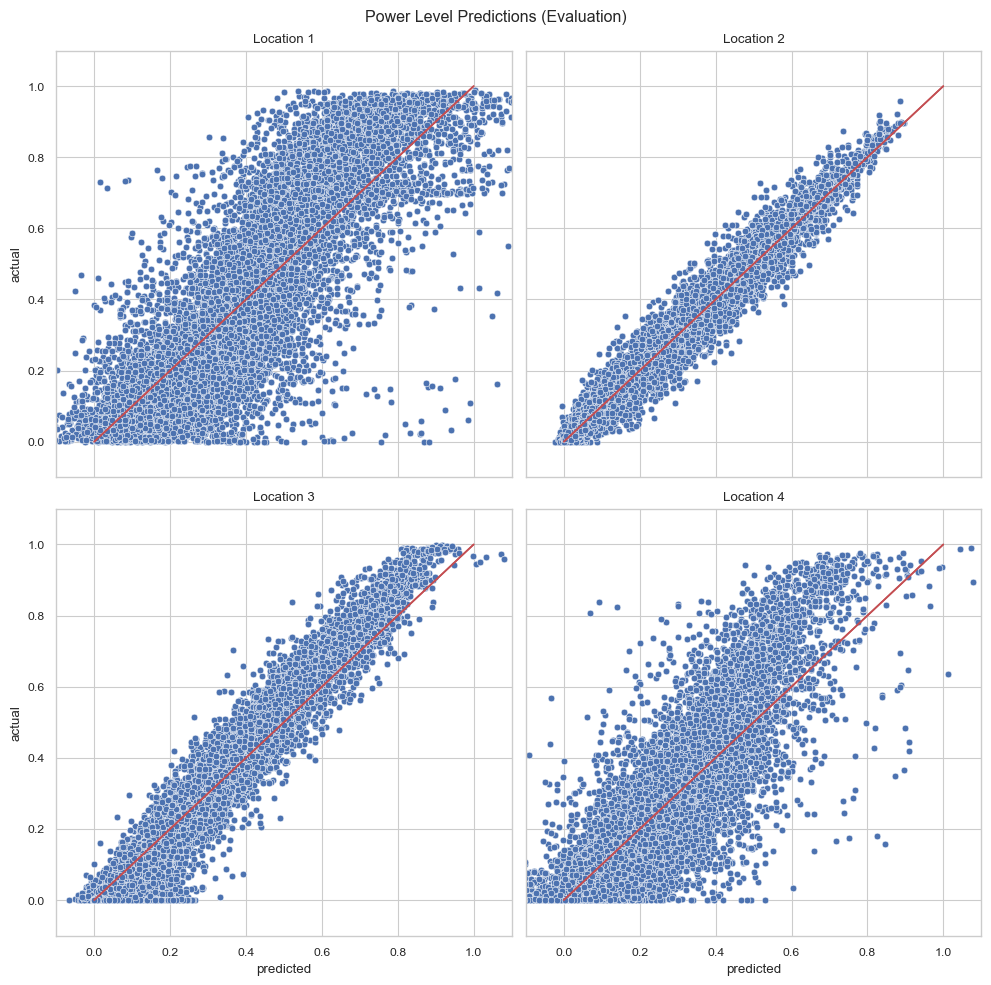

In [9]:
# visualize predictions
fig, _ = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(10,10)
for idx, (y_t, y_p) in enumerate(zip(y_true, y_pred)):
    plt.subplot(2, 2, idx+1)
    data = pd.DataFrame({
        'actual': y_t,
        'predicted': y_p
    })
    sns.scatterplot(data, x='predicted', y='actual')
    plt.plot([[0,0], [1,1]], color='r')
    plt.title(f'Location {idx+1}')
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.suptitle('Power Level Predictions (Evaluation)')
plt.tight_layout()
plt.show()

It is notable that SVM, like in the previous case, appears to be over-estimating
low-output situations and under-estimating high-output cases. Only for location 2
do we see a symmetric distribution of points around the ideal, the red line marking
100% accuracy.
This indicates an internal bias poorly regulated with the given parameter grid
except for location 2.

--------------------------------------------------------------------------------

To the [[Artificial Neural Network Notebook]](./ann.ipynb)

Back to the [[ML Notebook]](./ml.ipynb)

Back to the [[README]](./README.md)